# import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'C:/Users/Demi/Desktop/TB2/Mini project/df.csv'
data = pd.read_csv(file_path)
data = data.drop('Unnamed: 0', axis=1)
data

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
3,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


In [3]:
income = data[data['Amount'] > 0]
income = income.sort_values(by=['Account No', 'DateTime'])
income

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime
20203,101531259.0,427.437950,1542.5,NaN,Hobbycraft,2023-01-31 00:00:00
38427,101531259.0,713.096750,1542.5,NaN,Hobbycraft,2023-02-28 00:00:00
56651,101531259.0,1109.055050,1542.5,NaN,Hobbycraft,2023-03-31 00:00:00
74362,101531259.0,1299.455700,1542.5,NaN,Hobbycraft,2023-04-30 00:00:00
93250,101531259.0,1479.357600,1542.5,NaN,Hobbycraft,2023-05-31 00:00:00
...,...,...,...,...,...,...
133408,999752672.0,2499.562844,2708.0,NaN,CPA,2023-07-31 00:00:00
154652,999752672.0,2691.089544,2708.0,NaN,CPA,2023-08-31 00:00:00
176132,999752672.0,2769.420944,2708.0,NaN,CPA,2023-09-30 00:00:00
198500,999752672.0,3337.786894,2708.0,NaN,CPA,2023-10-31 00:00:00


In [4]:
income['DateTime'] = pd.to_datetime(income['DateTime'])

# Split the datetime column into two separate columns for date and time
income['Date'] = income['DateTime'].dt.date
income['Time'] = income['DateTime'].dt.time
income

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Time
20203,101531259.0,427.437950,1542.5,NaN,Hobbycraft,2023-01-31,2023-01-31,00:00:00
38427,101531259.0,713.096750,1542.5,NaN,Hobbycraft,2023-02-28,2023-02-28,00:00:00
56651,101531259.0,1109.055050,1542.5,NaN,Hobbycraft,2023-03-31,2023-03-31,00:00:00
74362,101531259.0,1299.455700,1542.5,NaN,Hobbycraft,2023-04-30,2023-04-30,00:00:00
93250,101531259.0,1479.357600,1542.5,NaN,Hobbycraft,2023-05-31,2023-05-31,00:00:00
...,...,...,...,...,...,...,...,...
133408,999752672.0,2499.562844,2708.0,NaN,CPA,2023-07-31,2023-07-31,00:00:00
154652,999752672.0,2691.089544,2708.0,NaN,CPA,2023-08-31,2023-08-31,00:00:00
176132,999752672.0,2769.420944,2708.0,NaN,CPA,2023-09-30,2023-09-30,00:00:00
198500,999752672.0,3337.786894,2708.0,NaN,CPA,2023-10-31,2023-10-31,00:00:00


In [5]:
income['Time'].value_counts()

Time
00:00:00    7164
23:59:00    2343
17:08:00       6
17:04:00       6
17:11:00       6
            ... 
08:26:00       1
07:53:00       1
00:33:00       1
21:15:00       1
19:42:00       1
Name: count, Length: 592, dtype: int64

#### Most of transaction with Amonut>0 in fix time  
#### Separate to fix time and no fix time

In [6]:
condition1 = income['Time'].isin([pd.to_datetime('00:00').time(), pd.to_datetime('23:59').time()])
condition2 = ~income['Time'].isin([pd.to_datetime('00:00').time(), pd.to_datetime('23:59').time()])
income1 = income[condition1]
income1

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Time
20203,101531259.0,427.437950,1542.5,NaN,Hobbycraft,2023-01-31,2023-01-31,00:00:00
38427,101531259.0,713.096750,1542.5,NaN,Hobbycraft,2023-02-28,2023-02-28,00:00:00
56651,101531259.0,1109.055050,1542.5,NaN,Hobbycraft,2023-03-31,2023-03-31,00:00:00
74362,101531259.0,1299.455700,1542.5,NaN,Hobbycraft,2023-04-30,2023-04-30,00:00:00
93250,101531259.0,1479.357600,1542.5,NaN,Hobbycraft,2023-05-31,2023-05-31,00:00:00
...,...,...,...,...,...,...,...,...
133408,999752672.0,2499.562844,2708.0,NaN,CPA,2023-07-31,2023-07-31,00:00:00
154652,999752672.0,2691.089544,2708.0,NaN,CPA,2023-08-31,2023-08-31,00:00:00
176132,999752672.0,2769.420944,2708.0,NaN,CPA,2023-09-30,2023-09-30,00:00:00
198500,999752672.0,3337.786894,2708.0,NaN,CPA,2023-10-31,2023-10-31,00:00:00


In [7]:
income2 = income[condition2]
income2

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Time
33429,104832000.0,50.799341,290.0,587923845.0,NaN,2023-02-15 06:57:00,2023-02-15,06:57:00
81173,104832000.0,-1212.478109,160.0,587923845.0,NaN,2023-05-02 12:18:00,2023-05-02,12:18:00
19143,108931112.0,560.765200,950.0,646840694.0,NaN,2023-01-28 13:38:00,2023-01-28,13:38:00
13926,113747882.0,1778.994750,1200.0,633345190.0,NaN,2023-01-17 04:20:00,2023-01-17,04:20:00
7866,116169597.0,-540.449900,200.0,846550094.0,NaN,2023-01-05 17:11:00,2023-01-05,17:11:00
...,...,...,...,...,...,...,...,...
101766,993238248.0,-654.680487,30.0,448279144.0,NaN,2023-06-06 04:13:00,2023-06-06,04:13:00
140912,993238248.0,-559.580487,230.0,448279144.0,NaN,2023-08-03 19:42:00,2023-08-03,19:42:00
18407,993663752.0,221.218492,90.0,672994751.0,NaN,2023-01-27 06:07:00,2023-01-27,06:07:00
89899,998405607.0,101.278000,590.0,388862238.0,NaN,2023-05-22 17:56:00,2023-05-22,17:56:00


# Salary1 - fix time have company and personal

In [8]:
average_values_df = income1.groupby(['Account No', 'Amount', ])['Amount'].count().reset_index(name='Count')
average_values_df.columns = ['Account No', 'Amount', 'Count']
average_values_df

,Account No,Amount,Count
0,101531259.0,1542.5,11
1,104832000.0,1675.0,12
2,105375973.0,900.0,11
3,106601471.0,1675.0,11
4,108481285.0,640.0,12
...,...,...,...
824,995615876.0,1733.0,11
825,996042490.0,3750.0,11
826,998390769.0,1625.0,12
827,998405607.0,450.0,11


In [36]:
average_values[average_values > 12]

Series([], Name: Amount, dtype: int64)

In [37]:
average_values[average_values > 9]

Account No   Amount
101531259.0  1542.5    11
104832000.0  1675.0    12
105375973.0  900.0     11
106601471.0  1675.0    11
108481285.0  640.0     12
                       ..
995615876.0  1733.0    11
996042490.0  3750.0    11
998390769.0  1625.0    12
998405607.0  450.0     11
999752672.0  2708.0    11
Name: Amount, Length: 829, dtype: int64

In [38]:
average_values[average_values < 10]

Series([], Name: Amount, dtype: int64)

#### All fix time transaction in same account and same amount happen 10~12 times

In [30]:
data['Account No'].nunique()

976

In [11]:
income1['Account No'].nunique()

810

#### There is 976 Accounts in origin dataset, and 810 Accounts have monthly income  
#### In 810 accounts, 791 accounts have one type monthly income and 19 Accounts have two types monthly inocme

In [12]:
duplicates = average_values_df[average_values_df.duplicated('Account No', keep=False)].sort_values('Account No')
duplicates

,Account No,Amount,Count
4,108481285.0,640.0,12
5,108481285.0,1584.0,11
47,145387690.0,590.0,11
48,145387690.0,1675.0,12
50,146909202.0,1270.0,12
51,146909202.0,1287.0,12
147,259015404.0,600.0,12
148,259015404.0,1633.0,12
154,264550521.0,1675.0,12
153,264550521.0,1010.0,11


In [13]:
income1['Date'].value_counts()

Date
2023-01-31    422
2023-04-30    422
2023-06-30    422
2023-07-31    422
2023-08-31    422
2023-09-30    422
2023-11-30    422
2023-02-28    421
2023-03-31    421
2023-05-31    421
2023-10-31    421
2023-01-01    396
2023-12-01    295
2023-11-01    295
2023-10-01    295
2023-09-01    295
2023-07-01    295
2023-05-01    295
2023-03-01    295
2023-06-01    294
2023-04-01    294
2023-02-01    294
2023-08-01    294
2023-06-29    112
2023-10-30    112
2023-09-29    112
2023-08-30    112
2023-07-30    112
2023-03-30    112
2023-05-30    112
2023-04-29    112
2023-02-27    112
2023-01-30    112
2023-11-29    112
Name: count, dtype: int64

#### In income1 dataset and the Timestamp is 00:00 and 23:59, these are definitely the salary  
#### It happens only at start or end of every month, every same account and same amount have 10~12 records, which maybe due to missing record or December.

# Salary2 - not fix time only personal transfer

In [26]:
average_values_df2 = income2.groupby(['Account No', 'Amount', ])['Amount'].count().reset_index(name='Count')
average_values_df2.columns = ['Account No', 'Amount', 'Count']
average_values_df2

,Account No,Amount,Count
0,104832000.0,160.0,1
1,104832000.0,290.0,1
2,108931112.0,950.0,1
3,113747882.0,1200.0,1
4,116169597.0,200.0,1
...,...,...,...
889,993238248.0,30.0,1
890,993238248.0,230.0,1
891,993663752.0,90.0,1
892,998405607.0,590.0,1


In [40]:
average_values_df2[average_values_df2['Count'] > 1]

,Account No,Amount,Count
19,122884111.0,1920.0,2
171,235663459.0,1220.0,2
186,248658670.0,190.0,2
187,248658670.0,640.0,2
196,256045540.0,70.0,2
212,280098744.0,2060.0,2
232,293609137.0,240.0,2
242,310620484.0,970.0,2
248,329840194.0,10.0,2
400,496674181.0,420.0,2


#### The most of transaction have different Amount

In [41]:
av = income2.groupby(['Account No'])['Amount'].count().reset_index(name='Count')
av.columns = ['Account No', 'Count']
av2 = av[av['Count'] > 6]
len(av2)

34

In [42]:
av2

,Account No,Count
7,122884111.0,9
9,127809299.0,10
21,165045150.0,8
24,172084472.0,10
25,173335108.0,9
27,183186021.0,8
34,208381936.0,10
38,214765415.0,7
52,248658670.0,10
60,280200287.0,7


#### There are 34 accounts have transaction over 6 times  
#### And these all come from same Third Party Name No, but with different amount

In [61]:
additional_accounts_to_cal = [
    122884111, 127809299, 165045150, 172084472, 173335108, 183186021,
    208381936, 214765415, 248658670, 280200287, 383345285, 413557825,
    414454079, 423208402, 448004226, 452974357, 462962606, 492058070,
    494156462, 496674181, 593191200, 596463612, 660561861, 668175891,
    701070224, 711045550, 713057426, 762896656, 769319491, 812012103,
    835829467, 871200314, 961077907, 962295212
]

sal2 = income2[income2['Account No'].isin(additional_accounts_to_cal)]
sal2.drop(['Amount', 'Balance', 'DateTime', 'Date', 'Time'], axis=1, inplace=True)
sal2.drop_duplicates(inplace=True)
sal2

,Account No,Third Party Account No,Third Party Name
9019,122884111.0,924045955.0,NaN
70832,127809299.0,876890798.0,NaN
27874,165045150.0,520418719.0,NaN
7554,172084472.0,407574996.0,NaN
31503,173335108.0,611143859.0,NaN
55912,183186021.0,901037631.0,NaN
16109,208381936.0,254853117.0,NaN
55893,214765415.0,517190750.0,NaN
35768,248658670.0,121858569.0,NaN
39195,280200287.0,782013626.0,NaN


#### In 34 accounts, 14 already have fixed income, and 20 don't have 

In [62]:
sal3 = pd.merge(sal2, check1, on='Account No', how='inner')
sal3

,Account No,Third Party Account No_x,Third Party Name_x,Unnamed: 0,Amount,Third Party Account No_y,Third Party Name_y
0,127809299.0,876890798.0,NaN,20350,580.0,876890798.0,NaN
1,172084472.0,407574996.0,NaN,17,1943.0,NaN,Westport Care Home
2,248658670.0,121858569.0,NaN,20301,940.0,121858569.0,NaN
3,413557825.0,169689461.0,NaN,20653,580.0,169689461.0,NaN
4,414454079.0,134847904.0,NaN,20499,1650.0,134847904.0,NaN
5,448004226.0,627622066.0,NaN,447,770.0,627622066.0,NaN
6,452974357.0,149684419.0,NaN,20406,2273.0,NaN,Boots
7,492058070.0,492215823.0,NaN,20541,1694.0,NaN,Happy Days Home
8,593191200.0,454129843.0,NaN,225,770.0,454129843.0,NaN
9,660561861.0,698955014.0,NaN,314,1270.0,698955014.0,NaN


#### And 14 accounts have both fix income and not fix income  
#### 4 accounts have fixed company salary and have not fixed personal transaction  
#### 10 account have fixed and unfixed income from same personal transaction

In [63]:
salary_one = pd.read_csv('C:/Users/Demi/0-Mini Project/salary_onetypes.csv')
salary_two = pd.read_csv('C:/Users/Demi/0-Mini Project/salary_twotypes.csv')
check1 = salary_one[salary_one['Account No'].isin(additional_accounts_to_cal)]
check2  = salary_two[salary_two['Account No'].isin(additional_accounts_to_cal)]

In [37]:
check2

,Account No,Amount


# Salary1 - company or personal

In [8]:
salary1 = income1.copy()
salary1.drop(['Balance', 'DateTime', 'Date', 'Time'], axis=1, inplace=True)
salary1

,Account No,Amount,Third Party Account No,Third Party Name
20203,101531259.0,1542.5,NaN,Hobbycraft
38427,101531259.0,1542.5,NaN,Hobbycraft
56651,101531259.0,1542.5,NaN,Hobbycraft
74362,101531259.0,1542.5,NaN,Hobbycraft
93250,101531259.0,1542.5,NaN,Hobbycraft
...,...,...,...,...
133408,999752672.0,2708.0,NaN,CPA
154652,999752672.0,2708.0,NaN,CPA
176132,999752672.0,2708.0,NaN,CPA
198500,999752672.0,2708.0,NaN,CPA


In [9]:
salary1.drop_duplicates(inplace=True)

In [10]:
salary1

,Account No,Amount,Third Party Account No,Third Party Name
20203,101531259.0,1542.5,NaN,Hobbycraft
93,104832000.0,1675.0,NaN,A Yarn Story
20587,105375973.0,900.0,709632525.0,NaN
20298,106601471.0,1675.0,NaN,Hobbycraft
78,108481285.0,640.0,913801979.0,NaN
...,...,...,...,...
20217,995615876.0,1733.0,NaN,Matalan
20221,996042490.0,3750.0,NaN,Lloyds Pharmacy
336,998390769.0,1625.0,NaN,Kings Arms
20580,998405607.0,450.0,388862238.0,NaN


## 616 salary from company and 213 personal transfer

In [11]:
salary_company = salary1.dropna(subset=['Third Party Name'], inplace=False)
salary_company

,Account No,Amount,Third Party Account No,Third Party Name
20203,101531259.0,1542.5,NaN,Hobbycraft
93,104832000.0,1675.0,NaN,A Yarn Story
20298,106601471.0,1675.0,NaN,Hobbycraft
20334,108481285.0,1584.0,NaN,Happy Days Home
20392,108563213.0,3749.0,NaN,LBG
...,...,...,...,...
20521,994947671.0,1788.0,NaN,Grand Union BJJ
20217,995615876.0,1733.0,NaN,Matalan
20221,996042490.0,3750.0,NaN,Lloyds Pharmacy
336,998390769.0,1625.0,NaN,Kings Arms


In [12]:
salary_personal_store = salary1.dropna(subset=['Third Party Account No'], inplace=False)
salary_personal_store

,Account No,Amount,Third Party Account No,Third Party Name
20587,105375973.0,900.0,709632525.0,NaN
78,108481285.0,640.0,913801979.0,NaN
20564,108812033.0,830.0,386277162.0,NaN
182,117308635.0,1200.0,255814263.0,NaN
20276,119943495.0,400.0,352899149.0,NaN
...,...,...,...,...
20365,985188462.0,830.0,593378953.0,NaN
20619,987656636.0,2670.0,450896297.0,NaN
235,993238248.0,540.0,448279144.0,NaN
20591,993663752.0,670.0,672994751.0,NaN


#### There is 829 fix time income, and 616 income from company, 213 from personal transfer

## salary from one or two incomes - ?

In [14]:
salary1_sorted = salary1.sort_values(by='Account No')

In [15]:
accounts_with_two_income = salary1_sorted.groupby('Account No').filter(lambda x: len(x) == 2)
accounts_with_two_income

,Account No,Amount,Third Party Account No,Third Party Name
78,108481285.0,640.0,913801979.0,NaN
20334,108481285.0,1584.0,NaN,Happy Days Home
56,145387690.0,1675.0,NaN,The Crown
20535,145387690.0,590.0,221868392.0,NaN
371,146909202.0,1270.0,741269136.0,NaN
368,146909202.0,1287.0,NaN,Fitted Stitch
95,259015404.0,1633.0,NaN,North Face
96,259015404.0,600.0,146383025.0,NaN
20269,264550521.0,1010.0,151278285.0,NaN
351,264550521.0,1675.0,NaN,Tesco


#### For 145387690, 1675 is salary and 590 is rent, 590 is only transfer between two accounts
#### For 407574996, 1300 is not rent, they have a lot of transfer，like a family ?

#### Account have two incomes, one from company, the other from personal transaction

In [19]:
salary_twotypes = accounts_with_two_income.groupby('Account No')['Amount'].sum()
salary_twotypes

Account No
108481285.0    2224.0
145387690.0    2265.0
146909202.0    2557.0
259015404.0    2233.0
264550521.0    2685.0
287480331.0    2536.0
310375875.0    2255.0
364357875.0    2682.5
407574996.0    2909.0
456246119.0    2693.3
492215823.0    3035.0
572384506.0    3073.0
587225252.0    2800.0
609939116.0    2566.0
653667523.0    2235.0
678330503.0    2244.0
766941757.0    2905.0
899742927.0    2842.5
960208650.0    3110.0
Name: Amount, dtype: float64

In [25]:
accounts_to_remove = [
    108481285, 145387690, 146909202, 259015404, 264550521, 287480331,
    310375875, 364357875, 407574996, 456246119, 492215823, 572384506,
    587225252, 609939116, 653667523, 678330503, 766941757, 899742927,
    960208650
]


salary_onetypes = salary1[~salary1['Account No'].isin(accounts_to_remove)]
salary_onetypes

,Account No,Amount,Third Party Account No,Third Party Name
20203,101531259.0,1542.5,NaN,Hobbycraft
93,104832000.0,1675.0,NaN,A Yarn Story
20587,105375973.0,900.0,709632525.0,NaN
20298,106601471.0,1675.0,NaN,Hobbycraft
20392,108563213.0,3749.0,NaN,LBG
...,...,...,...,...
20217,995615876.0,1733.0,NaN,Matalan
20221,996042490.0,3750.0,NaN,Lloyds Pharmacy
336,998390769.0,1625.0,NaN,Kings Arms
20580,998405607.0,450.0,388862238.0,NaN


#### There is 19 accounts have two income, 791 accounts have one income

In [26]:
salary_twotypes.to_csv('salary_twotypes.csv')

In [27]:
salary_onetypes.to_csv('salary_onetypes.csv')

# Rent

In [3]:
income_person= pd.read_csv('C:/Users/Demi/0-Mini Project/salary_personal_store.csv')
income_person = income_person.drop('Unnamed: 0', axis=1)
income_person

,Account No,Amount,Third Party Account No,Third Party Name
0,105375973.0,900.0,709632525.0,NaN
1,108481285.0,640.0,913801979.0,NaN
2,108812033.0,830.0,386277162.0,NaN
3,117308635.0,1200.0,255814263.0,NaN
4,119943495.0,400.0,352899149.0,NaN
...,...,...,...,...
208,985188462.0,830.0,593378953.0,NaN
209,987656636.0,2670.0,450896297.0,NaN
210,993238248.0,540.0,448279144.0,NaN
211,993663752.0,670.0,672994751.0,NaN


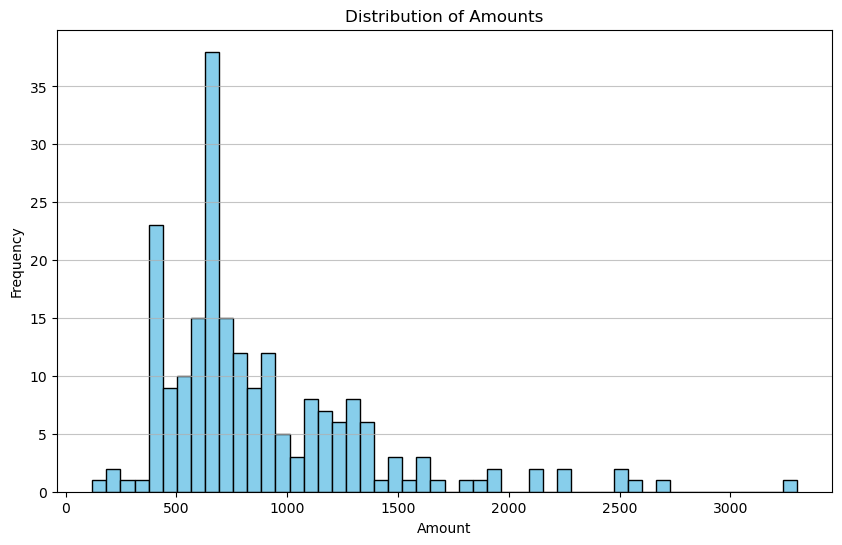

count     213.000000
mean      881.784038
std       486.397627
min       120.000000
25%       600.000000
50%       730.000000
75%      1110.000000
max      3300.000000
Name: Amount, dtype: float64

In [4]:
stats = income_person['Amount'].describe()

# Plot the distribution of the 'Amount' column using a histogram
plt.figure(figsize=(10, 6))
plt.hist(income_person['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

# Return the statistics of the Amount column as well
stats


In [5]:
income1= pd.read_csv('C:/Users/Demi/0-Mini Project/income1.csv')
income1 = income1.drop('Unnamed: 0', axis=1)
income1

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Time
0,101531259.0,427.437950,1542.5,NaN,Hobbycraft,2023-01-31 00:00:00,2023-01-31,00:00:00
1,101531259.0,713.096750,1542.5,NaN,Hobbycraft,2023-02-28 00:00:00,2023-02-28,00:00:00
2,101531259.0,1109.055050,1542.5,NaN,Hobbycraft,2023-03-31 00:00:00,2023-03-31,00:00:00
3,101531259.0,1299.455700,1542.5,NaN,Hobbycraft,2023-04-30 00:00:00,2023-04-30,00:00:00
4,101531259.0,1479.357600,1542.5,NaN,Hobbycraft,2023-05-31 00:00:00,2023-05-31,00:00:00
...,...,...,...,...,...,...,...,...
9502,999752672.0,2499.562844,2708.0,NaN,CPA,2023-07-31 00:00:00,2023-07-31,00:00:00
9503,999752672.0,2691.089544,2708.0,NaN,CPA,2023-08-31 00:00:00,2023-08-31,00:00:00
9504,999752672.0,2769.420944,2708.0,NaN,CPA,2023-09-30 00:00:00,2023-09-30,00:00:00
9505,999752672.0,3337.786894,2708.0,NaN,CPA,2023-10-31 00:00:00,2023-10-31,00:00:00


In [6]:
salary1= pd.read_csv('C:/Users/Demi/0-Mini Project/salary1.csv')
salary1 = salary1.drop('Unnamed: 0', axis=1)
salary1



,Account No,Amount,Third Party Account No,Third Party Name
0,101531259.0,1542.5,NaN,Hobbycraft
1,104832000.0,1675.0,NaN,A Yarn Story
2,105375973.0,900.0,709632525.0,NaN
3,106601471.0,1675.0,NaN,Hobbycraft
4,108481285.0,640.0,913801979.0,NaN
...,...,...,...,...
824,995615876.0,1733.0,NaN,Matalan
825,996042490.0,3750.0,NaN,Lloyds Pharmacy
826,998390769.0,1625.0,NaN,Kings Arms
827,998405607.0,450.0,388862238.0,NaN


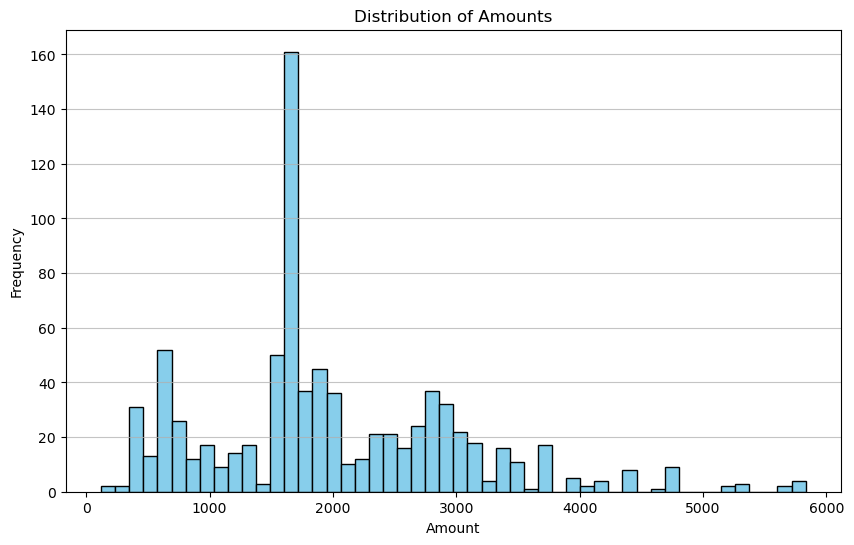

count     829.000000
mean     2001.221821
std      1035.721202
min       120.000000
25%      1542.500000
50%      1738.920000
75%      2694.000000
max      5833.000000
Name: Amount, dtype: float64

In [7]:

stats = salary1['Amount'].describe()

# Plot the distribution of the 'Amount' column using a histogram
plt.figure(figsize=(10, 6))
plt.hist(salary1['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

# Return the statistics of the Amount column as well
stats